In [ ]:
!pip install --upgrade setuptools pip
!pip install openslide
!apt update && apt install -y openslide-tools
!pip install openslide-python
!pip install py_wsi

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (50.3.0)
     |████████████████████████████████| 1.5MB 4.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
ERROR: Could not find a version that satisfies the requirement openslide (from versions: none)
ERROR: No matching distribution found for openslide
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]

In [ ]:
!pip install numba

In [ ]:
!git clone https://github.com/cosmiq/solaris.git
!cd /content/solaris

Cloning into 'solaris'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 5008 (delta 81), reused 69 (delta 36), pack-reused 4866
Receiving objects: 100% (5008/5008), 26.83 MiB | 13.90 MiB/s, done.
Resolving deltas: 100% (3248/3248), done.


#Pipeline for Installing Solaris

In [ ]:
#!pip install -r /content/solaris/requirements.txt

In [ ]:
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!apt install libgdal-dev libproj-dev --quiet
!apt install libgeos-dev
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet
!pip install splot hvplot geoviews --quiet

In [ ]:
!apt install python-cartopy python3-cartopy --quiet
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!apt install libgdal-dev libproj-dev --quiet
!apt install libgeos-dev
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet
!pip install urbanaccess pandana pysal --quiet
!pip install splot hvplot geoviews --quiet
!pip install --no-binary shapely shapely --upgrade --force-reinstall --quiet

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  python-pkg-resources python-pyshp python-shapely python-six python3-pyshp
  python3-shapely python3-six
Suggested packages:
  python-matplotlib python-owslib python-pil python-pyepsg python-scipy
  python-setuptools python-shapely-doc python3-matplotlib python3-owslib
  python3-pil python3-pyepsg python3-scipy
The following NEW packages will be installed:
  python-cartopy python-pkg-resources python-pyshp python-shapely python-six
  python3-cartopy python3-pyshp python3-shapely python3-six
0 upgraded, 9 newly installed, 0 to remove and 11 not upgraded.
Need to get 11.1 MB of archives.
After this operation, 20.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pyshp all 1.2.12+ds-1 [31.4 kB]
Ge

In [ ]:
!pip install geojson

In [ ]:
!pip install scikit-image

In [145]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numba import jit,cuda
import os
import geojson
import cv2
import pandas as pd
import rasterio
import skimage
#import cv2 as cv
#import torch,torchvision 
#import lmdb
#import py_wsi
#import py_wsi.imagepy_toolkit as tk

In [146]:
from skimage.draw import polygon,polygon2mask

In [544]:
with open('/content/countries.geo.json') as f:
  s=f.read()

In [545]:
#s

In [546]:
loader=geojson.loads(s)

In [547]:
#len(loader['features'])

In [548]:
#loader['features'][28]

In [549]:
#len(loader['features'][28]['geometry']['coordinates'][1][0])

In [550]:
# reads data
def cords_loader(loader):
  coordinates=[]
  for i in range(len(loader['features'])):
    if loader['features'][i]['geometry']['type']=='Polygon':
      coordinates.append(loader['features'][i]['geometry']['coordinates'][0])
    #Testing Addition
    elif loader['features'][i]['geometry']['type']=='MultiPolygon':
      for j in range(len(loader['features'][i]['geometry']['coordinates'])):
        coordinates.append(loader['features'][i]['geometry']['coordinates'][j][0])
  return coordinates

    

In [551]:
#len(coordinates)

In [552]:
#np.add(100,coordinates[0])

In [553]:
#offsets data to avoid negative integers
def cvt_cords2int(coordinates):
  cords_int=[]
  for i in range(len(coordinates)):
    cords_int.append(np.add(200,coordinates[i]).astype('int32'))
  return cords_int

In [554]:
#generates an empty image


In [579]:
def int2mask(cords_int,mask_size):
  mask=np.zeros(mask_size,dtype=np.bool)
  for i in range(len(cords_int)):
    mask=np.logical_or(mask,polygon2mask(mask_size,cords_int[i]))
  return mask

In [580]:
def draw_mask(loader,mask_size):
  coordinates=cords_loader(loader)
  cords_int=cvt_cords2int(coordinates)
  return int2mask(cords_int,mask_size)

In [563]:
#pg=polygon(cords_int[0][:,0],cords_int[0][:,1])
#pg[1]


In [564]:
#cords_int[0][:,0]

In [565]:
# combines all masks
#for i in range(len(cords_int)):
  #pg=polygon(cords_int[i][:,0],cords_int[i][:,1])
 # mask=np.logical_or(mask,polygon2mask((1024,1024),cords_int[i]))

In [566]:
#polygon2mask((512,512),cords_int[0])

In [577]:
#mask=draw_mask(loader)

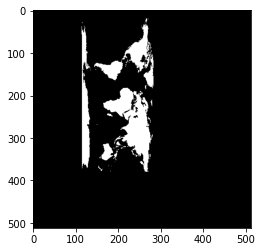

In [578]:
#plt.imshow(mask,cmap='binary_r')

In [576]:
def draw_mask(loader):
  coordinates=[]
  # reads data
  for i in range(len(loader['features'])):
    if loader['features'][i]['geometry']['type']=='Polygon':
      coordinates.append(loader['features'][i]['geometry']['coordinates'][0])
    #Testing Addition
    elif loader['features'][i]['geometry']['type']=='MultiPolygon':
      for j in range(len(loader['features'][i]['geometry']['coordinates'])):
        coordinates.append(loader['features'][i]['geometry']['coordinates'][j][0])
  #offsets data to avoid negative integers
  cords_int=[]
  for i in range(len(coordinates)):
    cords_int.append(np.add(200,coordinates[i]).astype('int32'))
  #generates black image
  mask=np.zeros((512,512),dtype=np.bool)
  # combines all masks
  for i in range(len(cords_int)):
    mask=np.logical_or(mask,polygon2mask((512,512),cords_int[i]))
  return mask

In [581]:
mask_size=(512,512)

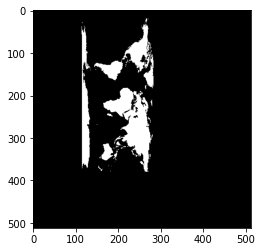

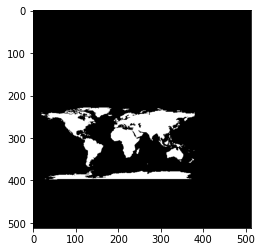

In [582]:
plt.figure()
plt.imshow(draw_mask(loader,mask_size),cmap='binary_r')
plt.figure()
plt.imshow(np.rot90(draw_mask(loader,mask_size),1),cmap='binary_r')

In [172]:

coordinates=loader['features'][0]['geometry']['coordinates'][0]
np_cords=np.array(coordinates)

In [173]:
cords_int=np_cords.astype('int32')

In [174]:
cords_int[:5]

array([[61, 35],
       [62, 35],
       [62, 35],
       [63, 35],
       [63, 36]], dtype=int32)

In [175]:
pg=polygon(cords_int[:,1],cords_int[:,0])

In [176]:
pg

(array([29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31,
        31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
        33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35,
        35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37]),
 array([60, 61, 62, 63, 64, 65, 61, 62, 63, 64, 65, 60, 61, 62, 63, 64, 65,
        66, 67, 68, 60, 61, 62, 63, 64, 65, 66, 67, 68, 60, 61, 62, 63, 64,
        65, 66, 67, 68, 69, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 63,
        64, 65, 66, 67, 68, 69, 70, 64, 65, 66, 67, 68, 69, 70, 72, 73, 70]))

In [364]:
#pol=np.array([[2,3],[3,1],[4,0]])
mask=polygon2mask((256,256),cords_int[0])

In [365]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

#Temp


In [ ]:
grid_name = '6010_4_2'
data_dir = '/content/'
shape = (3345, 3396)

# Load grid CSV
grid_sizes = pd.read_csv(os.path.join(data_dir, 'grid_sizes.csv'), index_col=0)
grid_sizes.ix[grid_name]


In [ ]:
def scale_coords(shape, grid_name, point):
    """Scale the coordinates of a polygon into the image coordinates for a grid cell"""
    w,h = shape
    Xmax, Ymin = grid_sizes.ix[grid_name][['Xmax', 'Ymin']]
    x,y = point[:,0], point[:,1]

    wp = float(w**2)/(w+1)
    xp = x/Xmax*wp

    hp = float(h**2)/(h+1)
    yp = y/Ymin*hp

    return np.concatenate([xp[:,None],yp[:,None]], axis=1)
    

In [ ]:
sh_fname = os.path.join(data_dir, 'train_geojson_v3/%s/002_TR_L4_POOR_DIRT_CART_TRACK.geojson'%grid_name)
with open(sh_fname, 'r') as f:
    sh_json = json.load(f)

# Scale the polygon coordinates to match the pixels
polys = []
for sh in sh_json['features']:
    geom = np.array(sh['geometry']['coordinates'][0])
    geom_fixed = scale_coords(shape, grid_name, geom)

    pts = geom_fixed.astype(int)
    polys.append(pts)

# Create an empty mask and then fill in the polygons
mask = np.zeros(shape)
cv2.fillPoly(mask, polys, 1)
mask = mask.astype(bool)

plt.imshow(mask)
#<matplotlib.image.AxesImage at 0x7f6c2509e828>